In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
교육현황 = pd.read_csv('./교육현황.csv')      # 보이스피싱 예방을 위한 교육을 이수한 교육자 통계
무대응 = pd.read_csv('./무대응사유.csv')      # 보이스피싱에 대해 대응처리를 안한 피해자 통계
침해 = pd.read_csv('./침해경험.csv')         # 보이스피싱 침해 경험 통계
발생 = pd.read_csv('./발생건수.csv')         # 보이스피싱 피해자 통계

In [149]:
교육현황

,2018,2019,2020,2021,2022
0,"729,694","782,193","1,152,071","1,036,971","959,484"


In [150]:
무대응

,구분,2017년,2018년,2019년,2020년,2021년
0,무대응 비중,65.8,61.5,69.1,32.7,29.7
1,효과 없을 것 같음,0.0,23.5,28.5,27.1,30.9
2,번거롭고 귀찮은 절차,0.0,21.6,25.3,26.8,24.4
3,경미한 피해,0.0,24.7,20.5,24.3,19.9
4,방법 및 절차를 모름,0.0,29.9,24.4,19.0,22.8
5,기타,0.0,0.3,1.3,2.8,2.1


In [151]:
침해

,구분,2017년,2018년,2019년,2020년,2021년
0,침해 경험 없음,28.3,35.0,44.0,49.4,55.7
1,유출,21.0,20.7,21.8,28.0,24.8
2,무단수집 및 이용,22.3,34.4,26.9,27.4,24.3
3,과도한 수집,23.5,0.0,0.0,0.0,0.0
4,도용,4.3,9.6,6.5,11.6,12.7
5,권리행사 거부,0.0,0.0,0.0,3.1,2.6
6,기타,0.6,0.2,0.7,0.7,0.9


In [152]:
발생

,연도,발생 건수
0,2006,"1,488"
1,2007,"3,981"
2,2008,"8,454"
3,2009,"6,720"
4,2010,"5,455"
5,2011,"8,244"
6,2012,"5,709"
7,2013,"21,634"
8,2014,"22,205"
9,2015,"18,549"


In [153]:
무대응 = 무대응.drop([0], axis = 0)
무대응

,구분,2017년,2018년,2019년,2020년,2021년
1,효과 없을 것 같음,0.0,23.5,28.5,27.1,30.9
2,번거롭고 귀찮은 절차,0.0,21.6,25.3,26.8,24.4
3,경미한 피해,0.0,24.7,20.5,24.3,19.9
4,방법 및 절차를 모름,0.0,29.9,24.4,19.0,22.8
5,기타,0.0,0.3,1.3,2.8,2.1


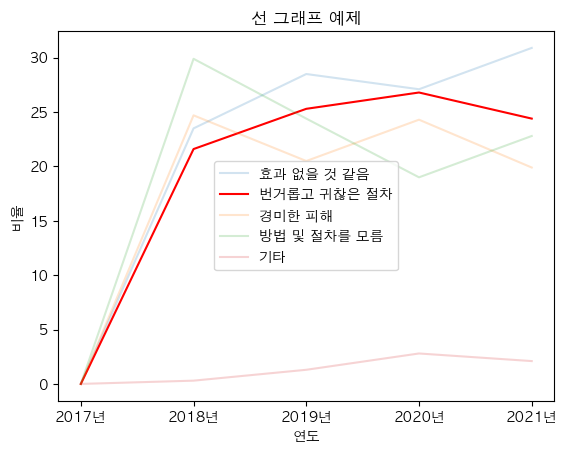

In [154]:
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False

for index, row in 무대응.iterrows():
    if row['구분'] == '번거롭고 귀찮은 절차':
        plt.plot(무대응.columns[1:], row[1:], label=row['구분'], color='red', alpha=1.0)
    else:
        plt.plot(무대응.columns[1:], row[1:], label=row['구분'], alpha=0.2)

# 그래프에 제목과 축 레이블 추가
plt.title('선 그래프 예제')
plt.xlabel('연도')
plt.ylabel('비율')

# 범례 추가
plt.legend()

# 그래프 보이기
plt.show()

In [155]:
침해.drop([0], axis = 0, inplace=True)

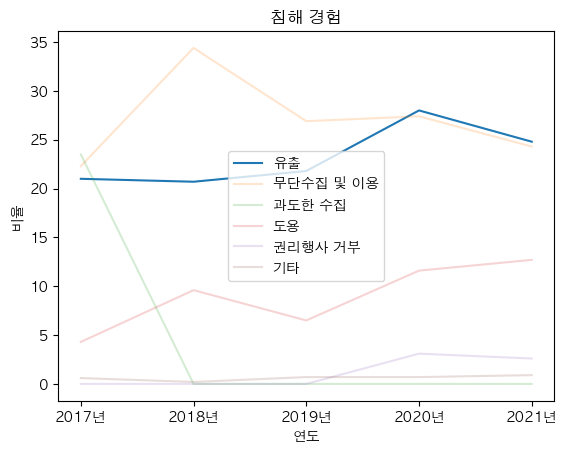

In [156]:
for index, row in 침해.iterrows():
    if row['구분'] == '유출':
        plt.plot(침해.columns[1:], row[1:], label=row['구분'], alpha=1.0)
    else:
        plt.plot(침해.columns[1:], row[1:], label=row['구분'], alpha=0.2)

# 그래프에 제목과 축 레이블 추가
plt.title('침해 경험')
plt.xlabel('연도')
plt.ylabel('비율')

# 범례 추가
plt.legend()

# 그래프 보이기
plt.show()

<Axes: xlabel='연도'>

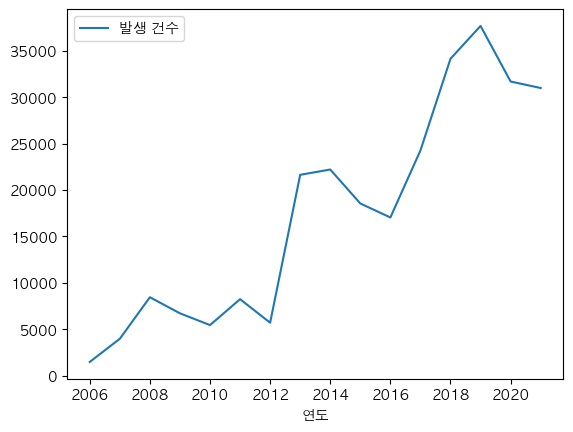

In [157]:
발생['발생 건수'] = 발생['발생 건수'].str.replace(',', '')
발생['발생 건수'] = 발생['발생 건수'].astype('float')
발생.plot(x='연도', y = '발생 건수')

In [158]:
교육현황 = 교육현황.melt(value_name='교육자', var_name='연도')

# ',' 제거하고 숫자로 변환
교육현황['교육자'] = pd.to_numeric(교육현황['교육자'].str.replace(',', ''), errors='coerce')
교육현황

,연도,교육자
0,2018,729694
1,2019,782193
2,2020,1152071
3,2021,1036971
4,2022,959484


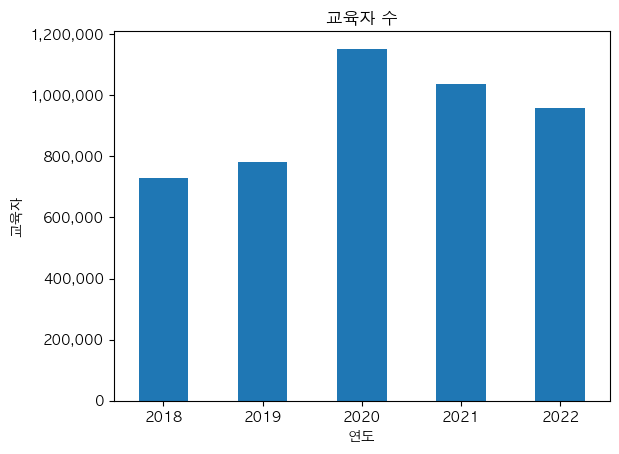

In [168]:
from matplotlib.ticker import FuncFormatter

ax = 교육현황.plot(x='연도', y='교육자', kind='bar', legend=False)

# Y축 값의 포맷팅 함수 정의 (예: 천 단위로 쉼표)
def format_thousands(x, pos):
    return f'{x:,.0f}'

# Y축 값의 포맷팅 함수를 적용
ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# 그래프에 제목과 축 레이블 추가
plt.title('교육자 수')
plt.xlabel('연도')
plt.ylabel('교육자')

# 그래프 보이기
plt.show()